In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
loc="//content//gdrive//My Drive//DataVisProj//Datasets//"

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd

In [0]:
feature_table=pd.read_csv(loc+"Feature_table.csv")

In [0]:
feature_table.shape

(6080, 13)

In [0]:
def TransformResult(row):
  if row.FTR=='H':
    return 1
  if row.FTR=='A':
    return -1
  if row.FTR=='D':
    return 0

In [0]:
feature_table["Result"] = feature_table.apply(lambda row: TransformResult(row),axis=1)

In [0]:
feature_table.head()

,Unnamed: 0,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS,Result
0,0,Charlton,Man City,H,14,4,6,6,1.056218,0.938272,1.037037,1.158433,1
1,1,Chelsea,West Ham,H,10,5,7,7,1.499148,0.987654,1.037037,1.022147,1
2,2,Coventry,Middlesbrough,A,3,9,8,4,0.477002,1.135802,1.283951,0.715503,-1
3,3,Derby,Southampton,D,4,6,5,8,0.783646,1.185185,0.641975,0.885860,0
4,4,Leeds,Everton,H,8,6,6,4,1.226576,1.037037,0.790123,1.090290,1


    FTR - Full Time Result
    HST - Home Shots on Target
    AST - Away Shots on Target
    HC - Home Team Corner
    AC - Away Team Corner
    HAS - Home Team Attacking Strength
    HDS - Home Team Defensive Strength
    AAS - Away Team Attacking Strength
    ADS - Away Team Defensive Strength

In [0]:
X=feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC','HAS','HDS','AAS','ADS']]
y=feature_table['Result']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [0]:
X_test.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS
3728,Derby,Chelsea,A,2,7,1,9,0.783646,1.185185,1.185185,0.851789
833,Man City,Newcastle,A,7,9,10,8,0.681431,1.530864,0.888889,1.124361
1744,Ipswich,Leicester,H,9,3,8,1,1.056218,0.740741,0.543210,0.954003
5604,West Ham,Chelsea,A,2,6,1,0,0.817717,0.987654,1.185185,0.851789
3092,Everton,Man United,A,4,9,6,5,0.988075,1.333333,1.481481,0.647359


In [0]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4864, 11), (1216, 11), (4864,), (1216,))

In [0]:
X_feat=X_train[['HST','AST','HC','AC','HAS','HDS','AAS','ADS']]
X_testfeat=X_test[['HST','AST','HC','AC','HAS','HDS','AAS','ADS']]

## Random Forest
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is: A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF1 = RandomForestClassifier(n_estimators=10,criterion='entropy', max_depth=7, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_feat)
RF1.fit(X_feat,y_train)
RF1_test=RF1.predict(X_testfeat)
RF1_train=RF1.predict(X_feat)

In [0]:
from sklearn import metrics

In [0]:
#Model Accuracy
print("Random Forest Accuracy")
RFacc=metrics.accuracy_score(y_test,RF1_test)
RFtrainacc=metrics.accuracy_score(y_train,RF1_train)
print("Test Accuracy:",metrics.accuracy_score(y_test, RF1_test))
print("Train Accuracy: ",RFtrainacc)

Random Forest Accuracy
Test Accuracy: 0.8856907894736842
Train Accuracy:  0.903577302631579


In [0]:
RFpred=pd.DataFrame({'Predicted': RF1_test})

In [0]:
def TransformPred(row):
  if row.Predicted==-1:
    return "AWAY"
  if row.Predicted==1:
    return "HOME"
  if row.Predicted==0:
    return "DRAW"

In [0]:
RFpred["RF"] = RFpred.apply(lambda row: TransformPred(row),axis=1)

In [0]:
RFpred.head()

,Predicted,RF
0,-1,AWAY
1,-1,AWAY
2,1,HOME
3,-1,AWAY
4,-1,AWAY


## Multinomial Naive Bayes
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

Multinomial Naive Bayes: This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score


In [0]:
#Choosing optimum alpha for NB Classifier
nbb_scores = []
for i in range(0,1000,50):
    mnb = MultinomialNB(alpha=i)
    mnb.fit(X_feat,y_train)
    scores = cross_val_score(mnb, X_feat, y_train, cv=10)
    print ("NB alpha ",i," : ", scores.mean())
    nbb_scores.append(scores.mean())  

NB alpha  0  :  0.5598296448399117
NB alpha  50  :  0.5612682840266686
NB alpha  100  :  0.5627081907369382
NB alpha  150  :  0.5645604650966275
NB alpha  200  :  0.5620934418333461
NB alpha  250  :  0.5614786929297539
NB alpha  300  :  0.5602453925520318
NB alpha  350  :  0.5606564926779392
NB alpha  400  :  0.5592186985068572
NB alpha  450  :  0.5596306436484397
NB alpha  500  :  0.5592182759990199
NB alpha  550  :  0.5594240373158922
NB alpha  600  :  0.5614799604532665
NB alpha  650  :  0.5616857217701389
NB alpha  700  :  0.5610701278508716
NB alpha  750  :  0.5573685366863556
NB alpha  800  :  0.5571606628302954
NB alpha  850  :  0.5602437025206818
NB alpha  900  :  0.5600375186959718
NB alpha  950  :  0.5592153184441571


Accuracy is maximum for alpha=150. So we train the Naive-Bayes Classifier with alpha=150

In [0]:
#Create a MNB Classifier
MNB1 = MultinomialNB(alpha=150)
MNB1.fit(X_feat,y_train)
MNB1_test=MNB1.predict(X_testfeat)
MNB1_train=MNB1.predict(X_feat)

In [0]:
# Model Accuracy
print("Multinominal-Naive-Bayes Accuracy")
MNBaccuracy=metrics.accuracy_score(y_test, MNB1_test)
MNBtrainacc=metrics.accuracy_score(y_train,MNB1_train)
print("Test Accuracy:",metrics.accuracy_score(y_test, MNB1_test))
print("Train Accuracy:",MNBtrainacc)

Multinominal-Naive-Bayes Accuracy
Test Accuracy: 0.5674342105263158
Train Accuracy: 0.5653782894736842


In [0]:
MNBpred=pd.DataFrame({'Predicted': MNB1_test})

In [0]:
MNBpred["MNB"] = MNBpred.apply(lambda row: TransformPred(row),axis=1)

In [0]:
MNBpred.head()

,Predicted,MNB
0,-1,AWAY
1,-1,AWAY
2,1,HOME
3,-1,AWAY
4,-1,AWAY


## Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

1 / (1 + e^-value)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr=LogisticRegression()
lr.fit(X_feat,y_train)
lr1_test=lr.predict(X_testfeat)
lr1_train=lr.predict(X_feat)

In [0]:
# Model Accuracy
print("Logistic Regression Accuracy:")
LRaccuracy=metrics.accuracy_score(y_test, lr1_test)
LRtrainacc=metrics.accuracy_score(y_train,lr1_train)
print("Test Accuracy:",metrics.accuracy_score(y_test, lr1_test))
print("Train Accuracy:",LRtrainacc)

Logistic Regression Accuracy:
Test Accuracy: 0.5929276315789473
Train Accuracy: 0.5984786184210527


In [0]:
LRpred=pd.DataFrame({'Predicted': lr1_test})

In [0]:
LRpred["LR"] = LRpred.apply(lambda row: TransformPred(row),axis=1)

In [0]:
LRpred.head()

,Predicted,LR
0,-1,AWAY
1,-1,AWAY
2,1,HOME
3,-1,AWAY
4,-1,AWAY


### Neural Network - Multi Layer Perceptron


In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
MLPclass = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=500, alpha=0.001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [0]:
MLPclass.fit(X_feat,y_train)

Iteration 1, loss = 1.12427413
Iteration 2, loss = 1.00559882
Iteration 3, loss = 0.95764328
Iteration 4, loss = 0.92738937
Iteration 5, loss = 0.90751654
Iteration 6, loss = 0.89330366
Iteration 7, loss = 0.88437598
Iteration 8, loss = 0.87742890
Iteration 9, loss = 0.87344238
Iteration 10, loss = 0.86870577
Iteration 11, loss = 0.86525000
Iteration 12, loss = 0.86259515
Iteration 13, loss = 0.86024107
Iteration 14, loss = 0.85807829
Iteration 15, loss = 0.85597830
Iteration 16, loss = 0.85336180
Iteration 17, loss = 0.85144554
Iteration 18, loss = 0.84999262
Iteration 19, loss = 0.84751776
Iteration 20, loss = 0.84517305
Iteration 21, loss = 0.84467796
Iteration 22, loss = 0.84215655
Iteration 23, loss = 0.84035872
Iteration 24, loss = 0.83860763
Iteration 25, loss = 0.83748877
Iteration 26, loss = 0.83583547
Iteration 27, loss = 0.83409205
Iteration 28, loss = 0.83182047
Iteration 29, loss = 0.83073438
Iteration 30, loss = 0.82889884
Iteration 31, loss = 0.82807770
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)

In [0]:
MLP_test=MLPclass.predict(X_testfeat)
MLP_trainpred=MLPclass.predict(X_feat)

In [0]:
# Model Accuracy
print("Neural Network - Multi Layer Perceptron Accuracy:")
MLPaccuracy=metrics.accuracy_score(y_test, MLP_test)
MLPtrainacc=metrics.accuracy_score(y_train,MLP_trainpred)
print("Test Accuracy:",MLPaccuracy)
print("Train Accuracy:",MLPtrainacc)

Neural Network - Multi Layer Perceptron Accuracy:
Test Accuracy: 0.8774671052631579
Train Accuracy: 0.90234375


In [0]:
MLPpred=pd.DataFrame({'Predicted': MLP_test})

In [0]:
MLPpred["MLP"] = MLPpred.apply(lambda row: TransformPred(row),axis=1)

In [0]:
MLPpred.head()

,Predicted,MLP
0,-1,AWAY
1,-1,AWAY
2,1,HOME
3,-1,AWAY
4,-1,AWAY


In [0]:
y_test.head()

3728   -1
833    -1
1744    1
5604   -1
3092   -1
Name: Result, dtype: int64

## Support Vector Machine
SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

In [0]:
from sklearn.svm import SVC

In [0]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_feat, y_train)
SVC_pred=svclassifier.predict(X_testfeat)
SVC_trainpred=svclassifier.predict(X_feat)

In [0]:
# Model Accuracy
print("Support Vector Machine:")
SVCaccuracy=metrics.accuracy_score(y_test, SVC_pred)
SVCtrainacc=metrics.accuracy_score(y_train,SVC_trainpred)
print("Test Accuracy:",SVCaccuracy)
print("Train Accuracy:",SVCtrainacc)

Support Vector Machine:
Test Accuracy: 0.5995065789473685
Train Accuracy: 0.61328125


In [0]:
SVCpred=pd.DataFrame({'Predicted': SVC_pred})

In [0]:
SVCpred["SVC"] = SVCpred.apply(lambda row: TransformPred(row),axis=1)

In [0]:
SVCpred.head()

,Predicted,SVC
0,-1,AWAY
1,-1,AWAY
2,1,HOME
3,-1,AWAY
4,-1,AWAY


## Combine the Predictions of different models along with the actual outcome to a dataframe

In [0]:
df1=X_test[["HomeTeam"]]
df1.reset_index(inplace=True)
df1.head()
df2=X_test[['AwayTeam']]
df2.reset_index(inplace=True)
df3=X_test[['FTR']]
df3.reset_index(inplace=True)

In [0]:
finall=pd.DataFrame({
    'HomeTeam': df1['HomeTeam'],
    'AwayTeam': df2['AwayTeam'],
    'Actual Result': df3['FTR'],
    'RF': RFpred["RF"],
    'LR': LRpred["LR"],
    'MNB': MNBpred['MNB'],
    'MLP': MLPpred['MLP'],
    'SVC': SVCpred['SVC']})

In [0]:
finall.head()

,HomeTeam,AwayTeam,Actual Result,RF,LR,MNB,MLP,SVC
0,Derby,Chelsea,A,AWAY,AWAY,AWAY,AWAY,AWAY
1,Man City,Newcastle,A,AWAY,AWAY,AWAY,AWAY,AWAY
2,Ipswich,Leicester,H,HOME,HOME,HOME,HOME,HOME
3,West Ham,Chelsea,A,AWAY,AWAY,AWAY,AWAY,AWAY
4,Everton,Man United,A,AWAY,AWAY,AWAY,AWAY,AWAY


In [0]:
finall.to_csv(loc+'final.csv')

### Compare the Accuracy of the models

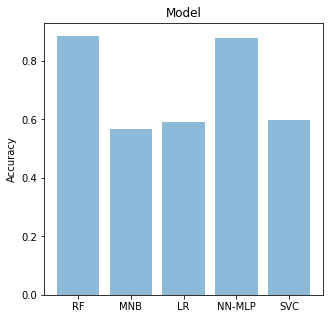

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(5,5))
models = ('RF', 'MNB', 'LR', 'NN-MLP', 'SVC')
performance = [RFacc,MNBaccuracy,LRaccuracy,MLPaccuracy,SVCaccuracy]
plt.bar(models, performance, align='center', alpha=0.5)
plt.ylabel('Accuracy')
plt.title('Model')

plt.show()